# ESCOLA POLITÉCNICA DA UNIVERSIDADE DE SÃO PAULO

## PQI 3403 Análise de Processos da Indústria Química 2021

### Case Study 1 - Clustering

In [11]:
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Models
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

# Dendogram construction
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

from kneed import KneeLocator


In [10]:
pip install kneed

## Question 1

In [3]:
# Importing dataset

url = 'https://raw.githubusercontent.com/vitorlavor/education/main/clustering/iris.csv'
df_iris = pd.read_csv(url, sep=';', header=0)
df_iris

,sepal_lenght,sepal_width,petal_lenght,petal_width,specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Train variables

var_iris = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width']
X1 = df_iris[var_iris]
X1

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
# Model construction and training
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage = 'single')

# Model fit
model1 = model1.fit(X1)

# Dendogram construction

Z = hierarchy.linkage(model1.children_, 'ward')

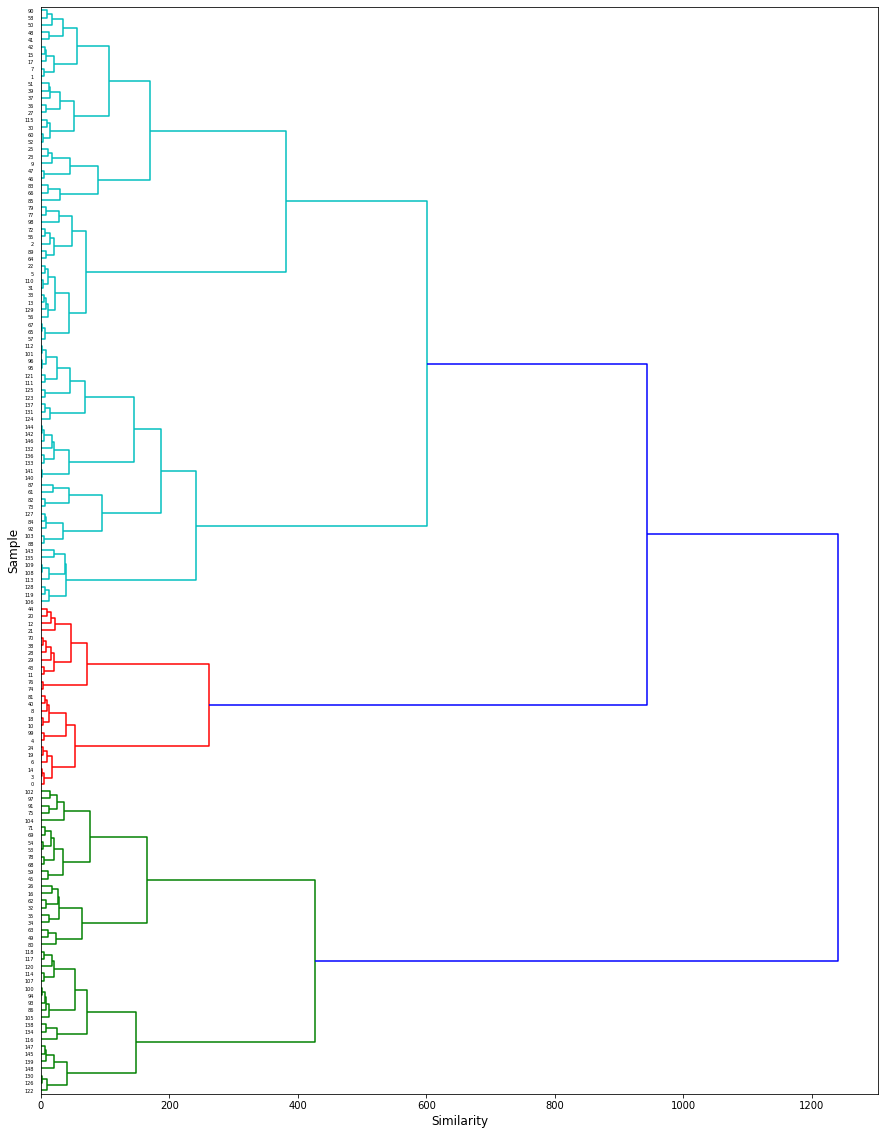

In [67]:
# Dendogram

plt.figure(figsize=(15,20))
dn = hierarchy.dendrogram(Z,orientation='right')
dh = plt.xlabel('Similarity', fontsize=12)
dh = plt.ylabel('Sample', fontsize=12)

## Question 2

In [6]:
# Train variables

var_iris2 = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width']
X2 = df_iris[var_iris2]
X2

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


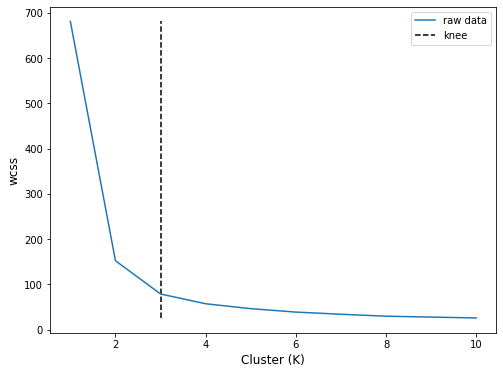

In [45]:
# Elbow Method

wcss = [] # within-clusters sum-of-squares

for i in range(1, 11): # 
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_) # 
    
# Plot

# Raw data and knee.
kneedle = KneeLocator(range(1, 11), wcss, S=1.0, curve="convex", direction="decreasing")
plt.figure(figsize=(8, 6))
plt.plot(kneedle.x, kneedle.y, label='raw data')
plt.vlines(kneedle.knee, kneedle.y.min(), kneedle.y.max(), linestyles='--', label='knee')
plt.xlabel('Cluster (K)', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.legend()


In [19]:
# Model construction and training

model2 = KMeans(n_clusters=3)

# Model fit

model2 = model2.fit(X2)

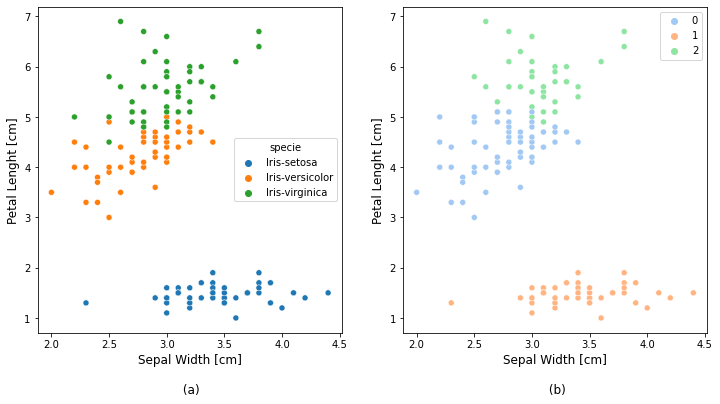

In [57]:
# Plot with true label / labels from KMeans

plt.figure(figsize = (12,6))
plt.subplot(121)
ax = sns.scatterplot(data= df_iris, x = 'sepal_width', y = 'petal_lenght', hue = 'specie')
ax = plt.xlabel('Sepal Width [cm]\n\n (a)', fontsize=12)
ax = plt.ylabel('Petal Lenght [cm]', fontsize=12)

plt.subplot(122)
ax = sns.scatterplot(data= X2, x = 'sepal_width', y = 'petal_lenght', hue = model2.labels_, palette = 'pastel')
ax = plt.xlabel('Sepal Width [cm]\n\n (b)', fontsize=12)
ax = plt.ylabel('Petal Lenght [cm]', fontsize=12)

## Questão 3


In [25]:
# Importing dataset

url_nba = 'https://raw.githubusercontent.com/vitorlavor/education/main/clustering/nba2020.csv'
df_nba = pd.read_csv(url_nba, sep=';', header=0)
df_nba

,name,position,height,weight
0,LeBron James,Ala,2.06,113.4
1,Kawhi Leonard,Ala,2.01,102.1
2,Giannis Antetokounmpo,Armador,2.11,109.8
3,Kevin Durant,Ala,2.08,104.3
4,James Harden,Armador,1.96,99.8
...,...,...,...,...
424,Brandon Goodwin,Armador,1.83,81.6
425,Michael Frazier,Armador,1.91,90.7
426,Kostas Antetokounmpo,Ala,2.08,90.7
427,Jalen Lecque,Armador,1.91,86.2


In [26]:
# Train variables

var_nba = ['height', 'weight']
X3 = df_nba[var_nba]
X3

,height,weight
0,2.06,113.4
1,2.01,102.1
2,2.11,109.8
3,2.08,104.3
4,1.96,99.8
...,...,...
424,1.83,81.6
425,1.91,90.7
426,2.08,90.7
427,1.91,86.2


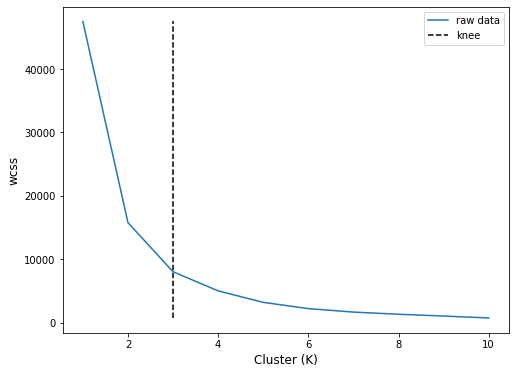

In [68]:
# Elbow Method

wcss_nba = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X3)
    wcss_nba.append(kmeans.inertia_)
    
# Plot

# Raw data and knee.
kneedle_nba = KneeLocator(range(1, 11), wcss_nba, S=1.0, curve="convex", direction="decreasing")
plt.figure(figsize=(8, 6))
plt.plot(kneedle_nba.x, kneedle_nba.y, label='raw data')
plt.vlines(kneedle_nba.knee, kneedle_nba.y.min(), kneedle_nba.y.max(), linestyles='--', label='knee')
plt.xlabel('Cluster (K)', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.legend()

In [28]:
# Model construction and training
model3 = KMeans(n_clusters=3)

# Model Fit
model3 = model3.fit(X3)

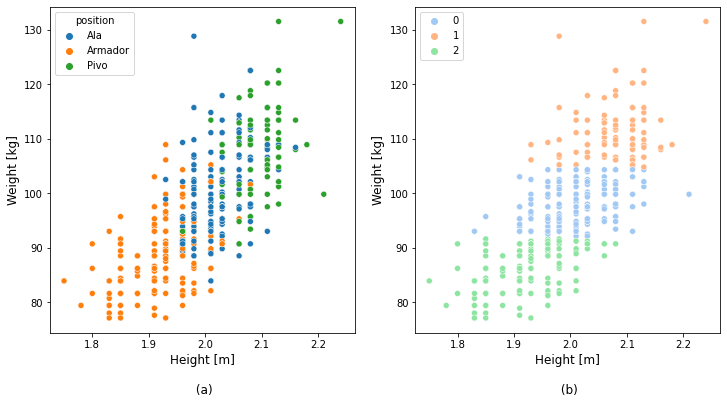

In [58]:
# Plot with true label / labels from KMeans

plt.figure(figsize = (12,6))
plt.subplot(121)
ax = sns.scatterplot(data= df_nba, x = 'height', y = 'weight', hue = 'position')
ax = plt.xlabel('Height [m]\n\n (a)', fontsize=12)
ax = plt.ylabel('Weight [kg]', fontsize=12)

plt.subplot(122)
sns.scatterplot(data= df_nba, x = 'height', y = 'weight', hue = model3.labels_, palette = 'pastel')
ax = plt.xlabel('Height [m]\n\n (b)', fontsize=12)
ax = plt.ylabel('Weight [kg]', fontsize=12)